In [2]:
# Problem 1
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

djia = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/DJIA.csv')
djia.index = pd.to_datetime(djia['DATE'])
del djia['DATE']
djia = djia.replace('.', np.NaN)
djia.VALUE = djia.VALUE.astype(float)

print(djia.head())
djia.dtypes

               VALUE
DATE                
2006-09-27  11689.24
2006-09-28  11718.45
2006-09-29  11679.07
2006-10-02  11670.35
2006-10-03  11727.34


VALUE    float64
dtype: object

In [2]:
# Problem 2
pay = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/paychecks.csv')
date_range1 = pd.date_range(start='3/13/2008', periods = 46, freq="WOM-3FRI")
index = pd.date_range(start='3/13/2008', periods = 46, freq="WOM-1FRI").union(date_range1)
pay.index = index
pay.head()

,1122.26
2008-03-21,921.03
2008-04-04,962.46
2008-04-18,1035.97
2008-05-02,1078.59
2008-05-16,1110.97


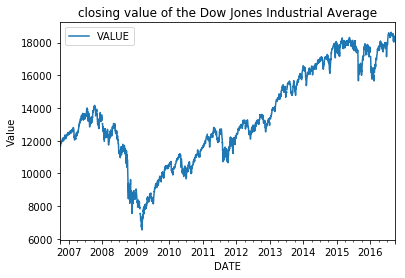

In [3]:
# Problem 3
djia.plot()
plt.ylabel('Value')
plt.title('closing value of the Dow Jones Industrial Average')
plt.show()

In [4]:
# Problem 4
fi = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/finances.csv')
p = pd.period_range("1978-07", periods = 84, freq="3M")
p = p.asfreq("Q-DEC")
fi.index = p
fi.head()

,EARNINGS,EXPENSES
1978Q3,372572.16,122611.27
1978Q4,419440.58,133176.18
1979Q1,419766.49,154670.69
1979Q2,361453.31,209360.42
1979Q3,354463.33,174147.13


In [5]:
# Problem 5
wt = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/website_traffic.csv')
enter = pd.to_datetime(wt['ENTER'])
leave = pd.to_datetime(wt['LEAVE'])

enter_1 = pd.to_timedelta(enter)
leave_1 = pd.to_timedelta(leave)
wt['duration'] = leave_1 - enter_1
print(wt['duration'].mean())
wt.index = pd.to_datetime(wt['ENTER'])
print(wt.resample('H').count()['IP'])

0 days 00:05:04.731647
ENTER
2016-10-07 01:00:00    618
2016-10-07 02:00:00    655
2016-10-07 03:00:00    670
2016-10-07 04:00:00    632
2016-10-07 05:00:00    672
2016-10-07 06:00:00    602
2016-10-07 07:00:00    660
2016-10-07 08:00:00    650
2016-10-07 09:00:00    665
2016-10-07 10:00:00    647
2016-10-07 11:00:00    605
2016-10-07 12:00:00    646
2016-10-07 13:00:00    670
2016-10-07 14:00:00    628
2016-10-07 15:00:00    607
2016-10-07 16:00:00    683
2016-10-07 17:00:00    632
2016-10-07 18:00:00    629
2016-10-07 19:00:00    702
2016-10-07 20:00:00    644
2016-10-07 21:00:00    641
2016-10-07 22:00:00    677
Freq: H, Name: IP, dtype: int64


In [18]:
# Problem 6
djia['pre'] = djia['VALUE'].shift(1)
djia['diff'] = djia['VALUE'] - djia['pre']
print(djia.loc[djia['diff'].idxmax()])
print(djia.loc[djia['diff'].idxmin()])

djia_1 = djia.resample('M').last()-djia.resample('M').first()
djia_1['pre'] = djia_1['VALUE'].shift(1)
djia_1['diff'] = djia_1['VALUE'] - djia_1['pre']
print(djia_1.loc[djia_1['diff'].idxmax()])
print(djia_1.loc[djia_1['diff'].idxmin()])


VALUE    9387.61
pre      8451.19
diff      936.42
Name: 2008-10-13 00:00:00, dtype: float64
VALUE    10365.45
pre      11143.13
diff      -777.68
Name: 2008-09-29 00:00:00, dtype: float64
VALUE    1299.71
pre      -580.19
diff     1879.90
Name: 2011-10-31 00:00:00, dtype: float64
VALUE   -1033.83
pre       627.30
diff    -1661.13
Name: 2009-01-31 00:00:00, dtype: float64


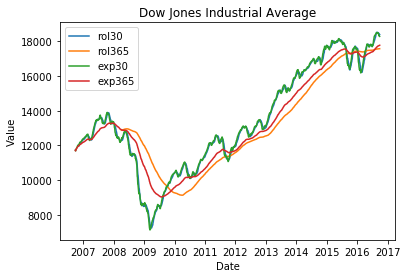

In [7]:
# Probelm 7
djia = djia.dropna()
djia['rol30'] = djia['VALUE'].rolling(window=30).mean().values
djia['rol365'] = djia['VALUE'].rolling(window=365).mean().values
djia['exp30'] = djia['VALUE'].ewm(span=30, freq='D').mean()
djia['exp365'] = djia['VALUE'].ewm(span=365, freq='D').mean()

plt.plot(djia['rol30'])
plt.plot(djia['rol365'])
plt.plot(djia['exp30'])
plt.plot(djia['exp365'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Dow Jones Industrial Average')
plt.legend()
plt.show()

